# Example to run inversion using box model
The inversion estimates the emissions deviation from some a priori value

In [ ]:
from py12box_invert import core, utils
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from py12box_invert.paths import Paths
from py12box_invert.invert import Invert, Matrices

species = "CFC-11"
project_path = Paths.data / f"example/{species}"

This runs the inversion to estimate yearly emissions different to a priori for each box

In [ ]:
inv = Invert(project_path, species, method="rigby14", ic_years=3)
inv.run_sensitivity(freq="yearly")
inv.run_spinup(nyears=10)
inv.run_initial_conditions()
inv.create_matrices(sigma_P=1.)
inv.run_inversion()
inv.posterior()

In [ ]:
inv.process_outputs()


In [ ]:
plt.plot(inv.outputs.emissions_global_annual[0])

Mole fraction plot

In [ ]:
inv.plot_mf()

Plot the results

In [ ]:
inv.plot_emissions()

In [65]:
inv.process_outputs(scale_error=0.02)

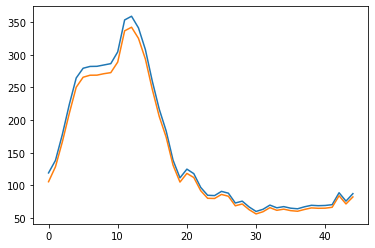

In [68]:
plt.plot(inv.outputs.emissions_global_annual[0] + inv.outputs.emissions_global_annual[1])
plt.plot(inv.outputs.emissions_global_annual[0] - inv.outputs.emissions_global_annual[1])